## PCA

We will use some datasets to show the power of PCA.

* iris
* 8x8 mnist
* Network Intrusion Detection using Python

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

## Iris

It is the normal iris dataset.

<ipython-input-193-fb1b7fdfb832>:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
<ipython-input-193-fb1b7fdfb832>:21: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-193-fb1b7fdfb832>:22: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-193-fb1b7fdfb832>:23: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be re

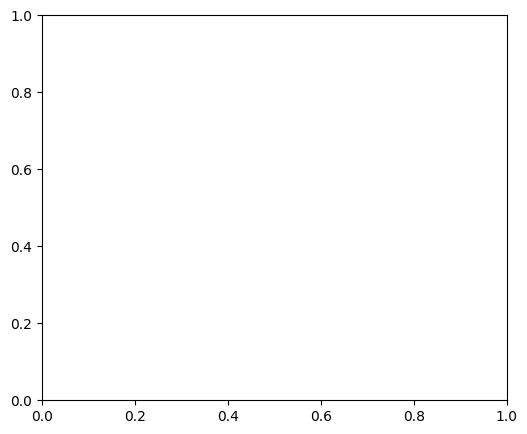

In [193]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Let's try PCA to reduce the dimension of iris data. First, we randomly split the iris dataset into two datasets, one for training (70%) and one for testing (30%).

In [195]:
from sklearn.model_selection import train_test_split

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

### Question #1:
Try to use a decision tree to train the traing dataset. How to find the best max_depth of the tree?

In [196]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

In [197]:
def find_maxDepth(X_train, X_test, y_train, y_test):
  possible_depth = 12
  for i in range(2, possible_depth):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=42)
    clf.fit(X_train, y_train)
    print(f'Depth: {i}')
    print('Train Accuracy:', round(clf.score(X_train, y_train), 5))
    print('Test Accuracy:', round(clf.score(X_test, y_test), 5))

In [198]:
find_maxDepth(X_train, X_test, y_train, y_test)

Depth: 2
Train Accuracy: 0.97143
Test Accuracy: 0.88889
Depth: 3
Train Accuracy: 0.98095
Test Accuracy: 0.97778
Depth: 4
Train Accuracy: 0.99048
Test Accuracy: 0.88889
Depth: 5
Train Accuracy: 1.0
Test Accuracy: 0.93333
Depth: 6
Train Accuracy: 1.0
Test Accuracy: 0.93333
Depth: 7
Train Accuracy: 1.0
Test Accuracy: 0.93333
Depth: 8
Train Accuracy: 1.0
Test Accuracy: 0.93333
Depth: 9
Train Accuracy: 1.0
Test Accuracy: 0.93333
Depth: 10
Train Accuracy: 1.0
Test Accuracy: 0.93333
Depth: 11
Train Accuracy: 1.0
Test Accuracy: 0.93333


From the above run, we found that max_depth=3 will be better.
Since max_depth=3 gives us better accuracy without being overfitting.

However, if we look at the following plot, we see that max_depth=2 can better classify the iris.
So, we choose max_depth=2

In [199]:
def plot_max_depth():
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

  for i, ax in enumerate(axes.flatten()):
      clf = DecisionTreeClassifier(criterion='gini', max_depth=i+2, random_state=42)
      clf.fit(X_train, y_train)
      tree.plot_tree(clf,
                    feature_names=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm'],
                    class_names=iris.target_names,
                    filled=True, ax=ax)
      ax.set_title('Max Depth = {}'.format(i+2))
  plt.show()

In [200]:
from sklearn.tree import DecisionTreeClassifier

# Decision trees with depth = 2

clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [201]:
# from sklearn.tree import DecisionTreeClassifier

# # Decision trees with depth = ?

### Question #2:

Predict the testing data. What is your accuracy_score?

In [202]:
print('Accuracy:', round(clf.score(X_test, y_test), 5))

Accuracy: 0.88889


### Question #3:

Try to use PCA to reduce the dimensionality to 2. Use the entire iris dataset. (DO NOT use training/testing data.) Plot 2-d figure with PCA data and their labels.

In [203]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

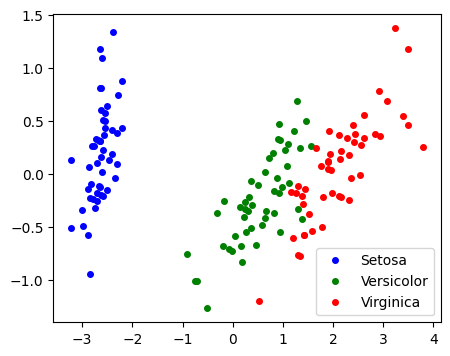

In [204]:
# Plotting the results of PCA
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(X_pca[y==0,0], X_pca[y==0,1],'bo',markersize=4,label='Setosa')
plt.plot(X_pca[y==1,0], X_pca[y==1,1],'go', markersize=4,label='Versicolor')
plt.plot(X_pca[y==2,0], X_pca[y==2,1],'ro', markersize=4,label='Virginica')
plt.legend(loc=0)
plt.show()

### Question #4:

Now, split the PCA data into two datasets (training 70%, testing 30%) and build a decision tree. What is the result? 

In [205]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y,test_size=0.3, stratify=y, random_state=42)

In [206]:
find_maxDepth(X_pca_train, X_pca_test, y_train, y_test)

Depth: 2
Train Accuracy: 0.95238
Test Accuracy: 0.91111
Depth: 3
Train Accuracy: 0.95238
Test Accuracy: 0.91111
Depth: 4
Train Accuracy: 0.99048
Test Accuracy: 0.88889
Depth: 5
Train Accuracy: 0.99048
Test Accuracy: 0.88889
Depth: 6
Train Accuracy: 1.0
Test Accuracy: 0.88889
Depth: 7
Train Accuracy: 1.0
Test Accuracy: 0.88889
Depth: 8
Train Accuracy: 1.0
Test Accuracy: 0.88889
Depth: 9
Train Accuracy: 1.0
Test Accuracy: 0.88889
Depth: 10
Train Accuracy: 1.0
Test Accuracy: 0.88889
Depth: 11
Train Accuracy: 1.0
Test Accuracy: 0.88889


From the run above, we see that max depth=2 performs better on testing data with lower depth.
So, we set max depth=2

In [207]:
# Test-train split and apply PCA
clf_pca = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
clf_pca.fit(X_pca_train, y_train)

print('Accuracy: ', round(clf_pca.score(X_pca_test, y_test),5))

Accuracy:  0.91111


### Question #5:

Is the accuracy higher? Why? Please give us a reasonable explaination.  

Ans: Yes, the accuracy increases from 0.8889 to 0.9111.  
Reason: From the heatmap below, we can see that the correlation among the iris features is highly correlated. For instance, the correlation between sepal length and petal legnth is 0.87.

In [208]:
import pandas as pd
iris_df = pd.DataFrame()
iris_df['sepal length in cm'] = pd.Series(X[:,0])
iris_df['sepal width in cm'] = pd.Series(X[:,1])
iris_df['petal length in cm'] = pd.Series(X[:,2])
iris_df['petal width in cm'] = pd.Series(X[:,3])
iris_df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


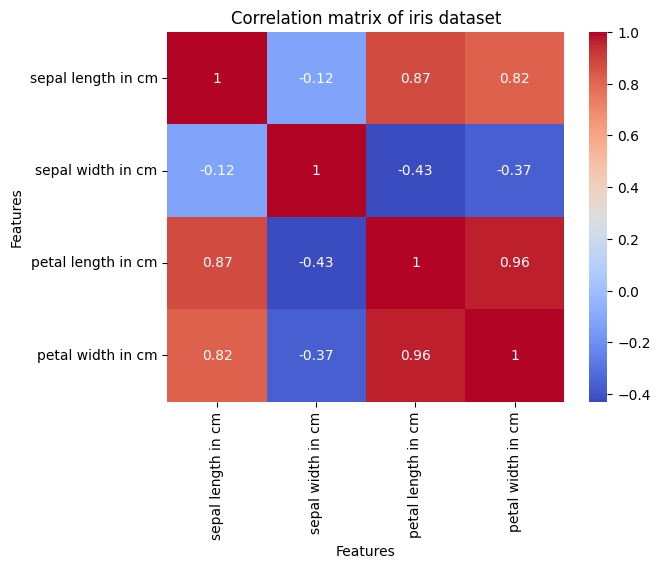

In [209]:
import seaborn as sns
# Create a correlation matrix

corr_matrix = iris_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and axis labels
plt.title('Correlation matrix of iris dataset')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

### Question #6:

How do you even get a higher accuracy rate? It is an open question, and try your best.

Hint: PCA parameters, data preprocessing and feature engineering.  
Ans: By using standardization and setting n_component as 1, we increase the accuracy to 0.9111.  
In addition, we also try to use random forest to further improve our result.

In [210]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data using the scaler
X_std = scaler.fit_transform(iris_df)

# Print the mean and standard deviation of the standardized data
print('Mean:', X_std.mean(axis=0))
print('Standard deviation:', X_std.std(axis=0))

Mean: [-4.73695157e-16 -7.81597009e-16 -4.26325641e-16 -4.73695157e-16]
Standard deviation: [1. 1. 1. 1.]


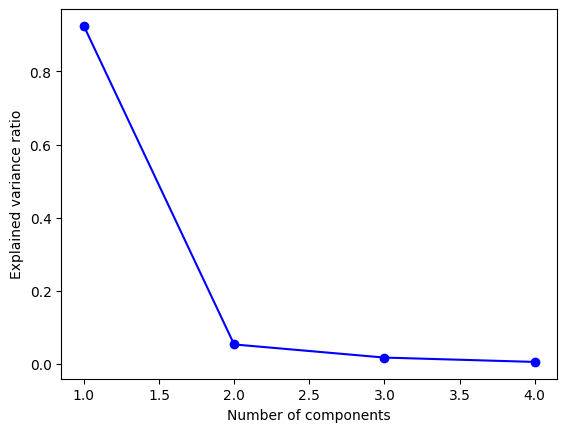

In [211]:
X_standardized = iris_df.values
pca = decomposition.PCA(n_components=4)
pca.fit(X_standardized)

# Plot the explained variance ratio as a function of the number of components
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

In [212]:
pca = decomposition.PCA(n_components=1)
pca.fit(X_standardized)
X_stan_pca = pca.transform(X_standardized)
X_stan_train, X_stan_test, y_stan_train, y_stan_test = train_test_split(X_stan_pca, y,test_size=0.3, stratify=y, random_state=42)

In [213]:
clf_stan_pca = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)

# Reshape the input data to have the same number of features as X_pca
X_stan_pca_train = X_stan_train.reshape(-1, 1)

# Fit the classifier to the data
clf_stan_pca.fit(X_stan_train, y_stan_train)

# Evaluate the performance of the classifier
accuracy = clf_stan_pca.score(X_stan_test.reshape(-1, 1), y_stan_test)
print('Accuracy:', accuracy)

Accuracy: 0.9111111111111111


In [214]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf_forest.fit(X_stan_train, y_stan_train)

# Evaluate the performance of the classifier on the testing data
accuracy = clf_forest.score(X_stan_test, y_stan_test)
print('Accuracy:', accuracy)

Accuracy: 0.9111111111111111


## MNIST

Let's look at a famous handwritten numbers dataset.

In [215]:
digits = datasets.load_digits()
digi_X = digits.data #by digi_X.shape, we have (1797, 64)
digi_y = digits.target

Each data sample has 64 features that represent a 8*8 grid. Each feature is a real number (0.0, 1.0), while 1 is white and 0 is black. Here are some examples.

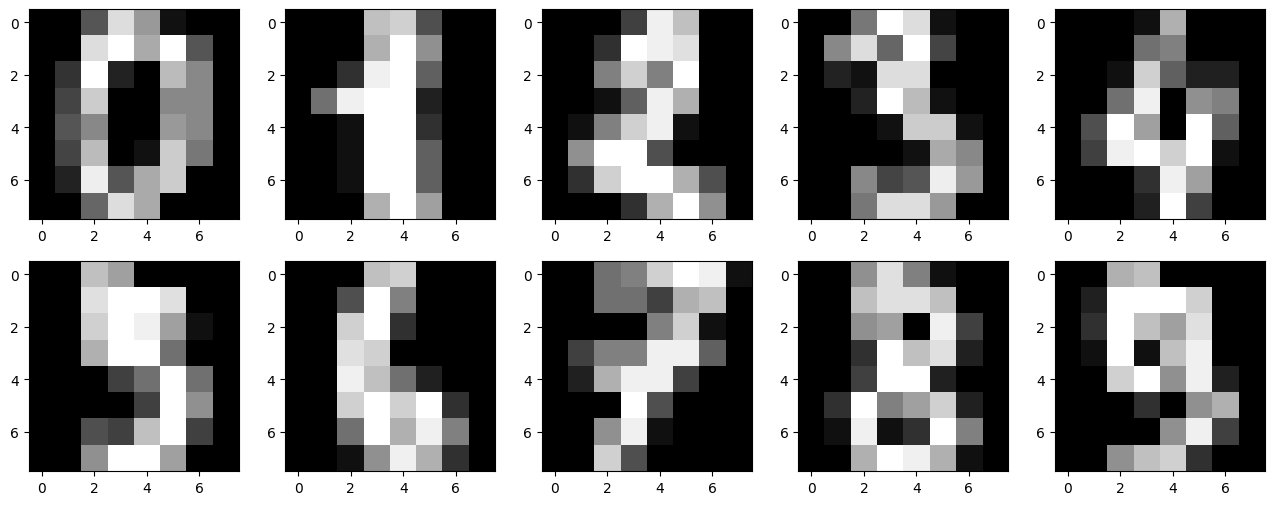

In [216]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digi_X[i,:].reshape([8,8]), cmap='gray');

### Question #7:

Try to use PCA to reduce the MNIST data to 2-dimension, and plot the 2-d figure with labels.

In [217]:
pca_mnist = decomposition.PCA(n_components=2)
pca_mnist.fit(digi_X)
digi_pca_X = pca_mnist.transform(digi_X)

Projecting 64-dimensional data to 2D


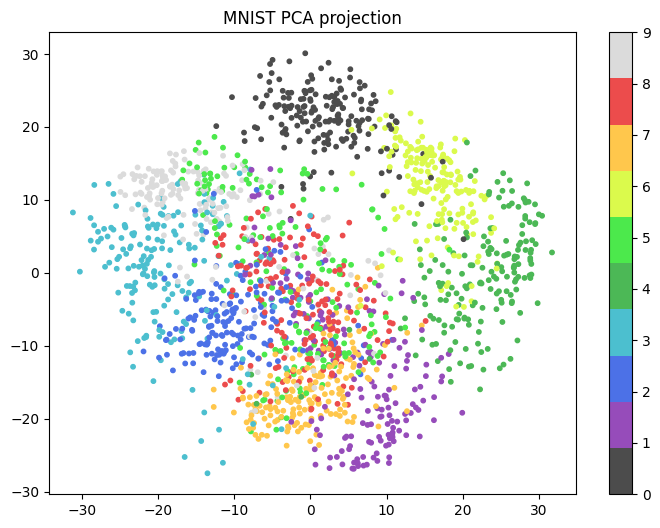

In [218]:
# Try plt.scatter and 'c' parameter
# Try plt.colorbar()
import matplotlib.colors as mcolors
print('Projecting 64-dimensional data to 2D')

# Define the colors in the custom colormap
colors = ['#4c4c4c', '#964cba', '#4c71e7', '#4cbfcf', '#4cb856', '#4ce94c', '#dbfa4c', '#ffc74c', '#ec4c4c', '#dbdbdb']

# Create the custom colormap
cmap = mcolors.ListedColormap(colors)

# Plot the scatterplot
fig, ax = plt.subplots(figsize=(8.5, 6))
scatter = ax.scatter(digi_pca_X[:,0], digi_pca_X[:,1], c=digi_y, s=10,cmap=cmap)

# Add a color bar
colorbar = plt.colorbar(scatter, ticks=[i for i in range(10)])
colorbar.ax.set_yticklabels([i for i in range(10)])

# Set axis labels and title
ax.set_title('MNIST PCA projection')
plt.show()


### Question #8:

Why the figure looks bad? How many components would be better?

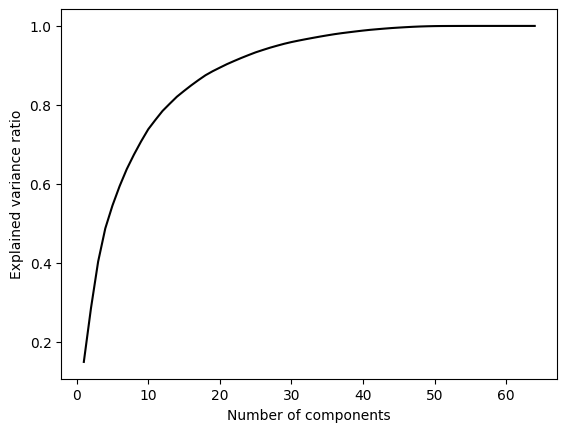

In [219]:
# hint: take a look at pca.explained_variance_ratio_
pca = decomposition.PCA(n_components=64)
pca.fit(digi_X)

# Plot the explained variance ratio as a function of the number of components
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), color='black')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

### Bonus #1:

(Extra points will be awarded.)

Try another technique for dimension reduction named "TSNE". Take a look at TSNE's document. Could you explain why TSNE is better?

Why TSNE is better: because MNIST is non-linear data. PCA is more suitable to deal with linear data while TSNE is better in dealing with non-linear data.  

  * PCA is a linear technique that aims to preserve the global structure of the data. It identifies the axes (principal components) along which the variance of the data is the highest and projects the data onto these axes. However, PCA may not perform well when dealing with non-linear relationships or complex data distributions, as is the case with the MNIST dataset (handwritten digits).

  * t-SNE, on the other hand, is a non-linear technique that focuses on preserving local structures in the data. It tries to **maintain the similarity between nearby points** in the high-dimensional space while reducing the dimensions. This makes t-SNE particularly suitable for visualizing complex datasets, like MNIST, where local structures and relationships between data points are more important than global structures.

In [220]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE

In [221]:
def tsne_transform(train_X):
  # Apply tsne on the given X
  tsne = TSNE(n_components=2, random_state=42)
  return tsne.fit_transform(train_X)

In [187]:
tsne_X = tsne_transform(digi_X)
tsne_X

array([[ -3.0371463,  54.765907 ],
       [ 10.420932 , -11.469612 ],
       [-13.423026 , -18.973404 ],
       ...,
       [ -5.8933887, -10.793155 ],
       [-20.830133 ,  14.959241 ],
       [-14.063864 ,  -7.1069965]], dtype=float32)

In [188]:
# plot TSNE
def plot_tsne_scatter(X,y):
  # Given a two dimensional X and its corresponding class y, we plot its scatter plot
  plt.figure(figsize=(10,5))
  plt.scatter(X[:,0], X[:,1],c=digi_y,s=10,cmap=cmap)
  plt.colorbar()
  plt.title("t-SNE on MNIST Dataset")
  plt.show()

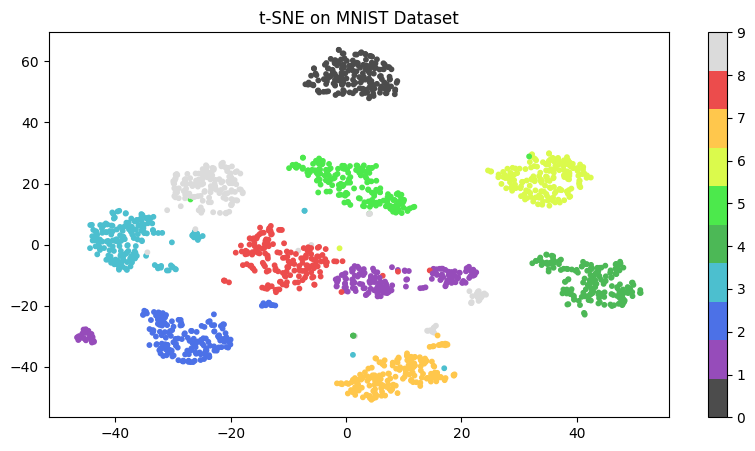

In [189]:
plot_tsne_scatter(tsne_X, digi_y)

## Hierarchical Clustering

Here is an example of Hierarchical Clustering.

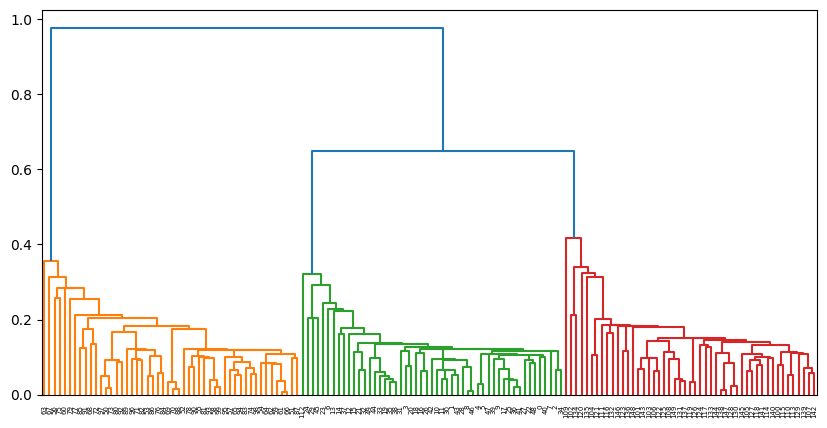

In [190]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

h_X = np.zeros((150, 2))# initialization

np.random.seed(seed=42)
h_X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)# Generates 50 random numbers from a normal distribution with mean 0.0 and standard deviation 0.3, and assigns them as the x-coordinates of the first 50 points
h_X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

h_X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
h_X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

h_X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
h_X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(h_X) # pdist calculates the uxpper triangle of the distance matrix
# Calculates the pairwise distances between all the points in the h_X array
# The result is a 1D array containing the upper triangle of the distance matrix, excluding the diagonal (self-distances)

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question #9:

Try to cluster iris data using the above codes. Show misclustered data points.

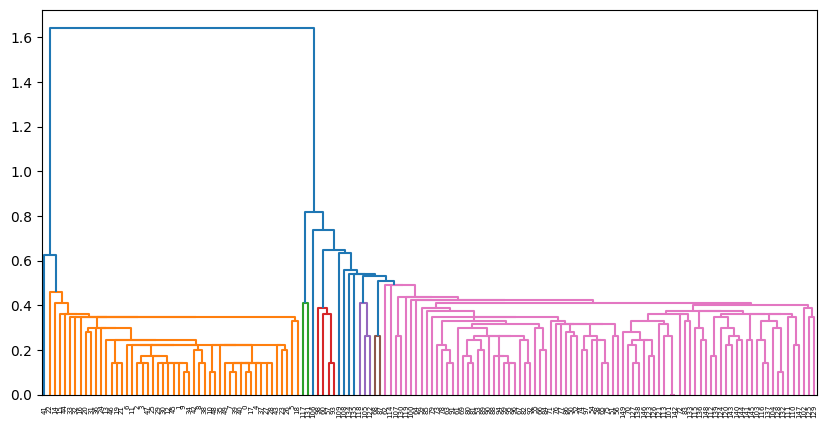

In [191]:
# Since hiearchical clustering is an unsupervised learning algo, we only use X to cluster
# iris.data.shape
iris_distance_mat = pdist(iris.data) #150 * 149 / 2 = 11,175 unique pairwise distances
single_link = hierarchy.linkage(iris_distance_mat)
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(single_link, color_threshold=0.5)

## Bonus: Network Intrusion Detection using Python

(Extra points will be awarded.)

You have tried NID before. Could you do a better acc rate(by using any techniques you have learned) ?

https://www.kaggle.com/code/sampadab17/network-intrusion-detection-using-python/data

Original accuracy: 0.985  
New accuracy: 0.99

#### Bonus #10:

Show you result of NID.  
After preprocessing, we can see that the result is higher than the provious one if we employ decision tree with level higher than 6.  
By doing so, we reach the acccuracy to 0.99.

In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/網路/Datasets/Train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/網路/Datasets/Test_data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [224]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocessor_func(df):
  #First change the type from int to float to standardize
  for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('float64')
  numeric_col = df.select_dtypes(include=['float64']).columns
  cat_col = df.select_dtypes(include=['object']).columns
  numeric_transformer = StandardScaler()
  df[numeric_col] = numeric_transformer.fit_transform(df[numeric_col])
  
  
  cat_transformer = LabelEncoder()
  for col in cat_col:
    df[col] = cat_transformer.fit_transform(df[col])
  
  return df

In [225]:
preprocessed_train = preprocessor_func(train)
preprocessed_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,-0.113551,1,19,9,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1
1,-0.113551,2,41,9,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1
2,-0.113551,1,46,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,0
3,-0.113551,1,22,9,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1
4,-0.113551,1,22,9,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1
5,-0.113551,1,46,1,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.868212,-1.001906,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,0
6,-0.113551,1,46,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.958592,-1.068731,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,0
7,-0.113551,1,46,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.904364,-1.024181,-0.066984,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,0
8,-0.113551,1,48,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.832060,-0.957356,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,0
9,-0.113551,1,46,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.922440,-1.046456,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,0


In [226]:
nid_train, nid_test = train_test_split(preprocessed_train, random_state=42)

In [227]:
#Build Decision tree
find_maxDepth(nid_train.drop('class',axis=1), nid_test.drop('class',axis=1), nid_train['class'], nid_test['class'])

Depth: 2
Train Accuracy: 0.94448
Test Accuracy: 0.9503
Depth: 3
Train Accuracy: 0.96618
Test Accuracy: 0.96983
Depth: 4
Train Accuracy: 0.97317
Test Accuracy: 0.97714
Depth: 5
Train Accuracy: 0.98031
Test Accuracy: 0.98015
Depth: 6
Train Accuracy: 0.99164
Test Accuracy: 0.99143
Depth: 7
Train Accuracy: 0.99338
Test Accuracy: 0.9927
Depth: 8
Train Accuracy: 0.99471
Test Accuracy: 0.99285
Depth: 9
Train Accuracy: 0.9964
Test Accuracy: 0.9946
Depth: 10
Train Accuracy: 0.99815
Test Accuracy: 0.99524
Depth: 11
Train Accuracy: 0.99894
Test Accuracy: 0.9946


#### Bonus #11:

Plot a single 2-d figure with clusters of NID labeled training data and non-labeled testing data. Note that testing data has no target and it is in another csv file. (Maybe you can use 'star' symbol to represet non-labeled testing data to make the figure clear to understand.)

In [233]:
#preprocessing testing data
preprocessed_test_X = preprocessor_func(test)
preprocessed_train_X = preprocessed_train.drop('class',axis=1)

#transoform the data into 2d
tsne_train_X = tsne_transform(preprocessed_train_X)
tsne_test_X = tsne_transform(preprocessed_test_X)

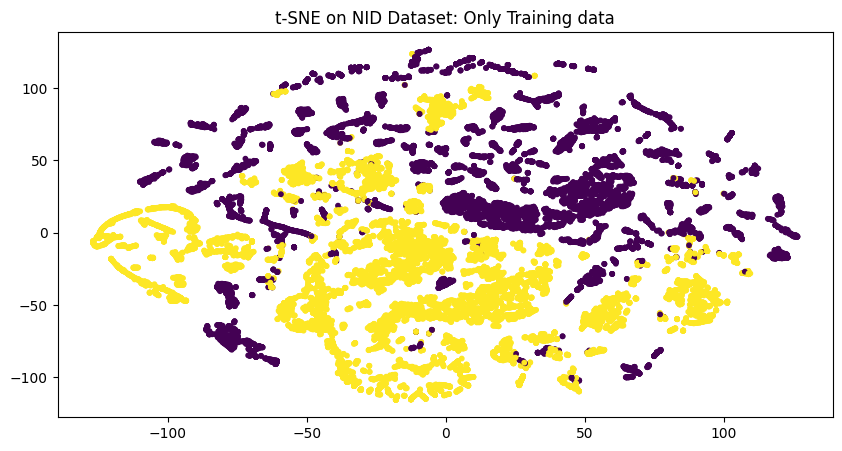

In [235]:
#plot the 2d
plt.figure(figsize=(10,5))
plt.scatter(tsne_train_X[:,0], tsne_train_X[:,1],c=preprocessed_train['class'],s=10)
# plt.colorbar()
plt.title("t-SNE on NID Dataset: Only Training data")
plt.show()

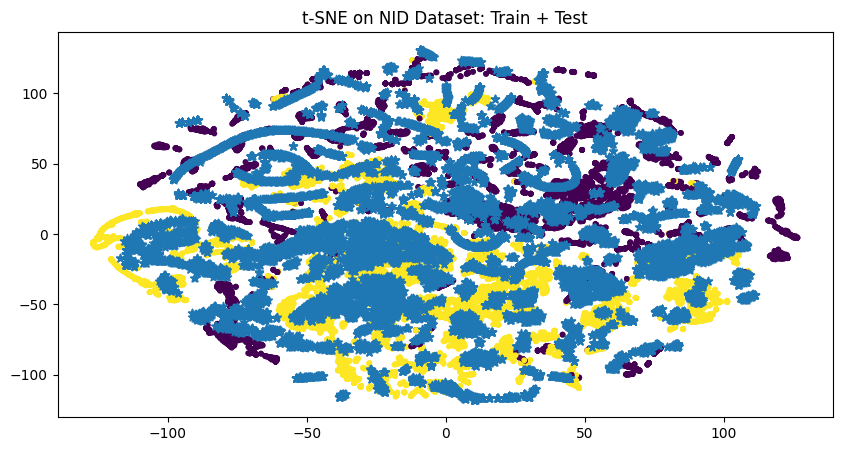

In [236]:
#plot the 2d
plt.figure(figsize=(10,5))
plt.scatter(tsne_train_X[:,0], tsne_train_X[:,1],c=preprocessed_train['class'],s=10)
plt.scatter(tsne_test_X[:,0],tsne_test_X[:,1],marker='*')
# plt.colorbar()
plt.title("t-SNE on NID Dataset: Train + Test")
plt.show()

#### Bonus #12:

Does the testing data points near the training data points? If so, why? If not, why not?  
Ans: Yes, the training data points are almost overlapping with testing data because they have similar feature values.